<a href="https://colab.research.google.com/github/helloWorld199/NAML-Training/blob/main/Jan_2021_ES1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 1
We consider a database containing geometrical features of iris plants. The dataset can be loaded with the following
commands:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None).to_numpy()
A = data[:, :4].T.astype(np.float64)
labels = data[:,4]
groups = ("Iris-setosa","Iris-versicolor","Iris-virginica")

Each column of the matrix A refers to a sample. Each rows corresponds to a feature. Specifically: <br>
 the 1st row contains the sepal length in cm; <br> 
 the 2nd row contains the sepal width in cm; <br>
 the 3rd row contains the petal length in cm; <br>
 the 4th row contains the petal width in cm. <br>
The vector labels contains the class of iris plants each samples belongs to. There are three classes: ’Iris-setosa’,
’Iris-versicolor’ and ’Iris-virginica’.



1.    How many samples are there in the dataset? How many samples belong to each class?



In [ ]:
print(A.shape)        #150 samples of 4 features each
print(labels.shape)   #150 labels

print("Number of Iris-setosa samples:", sum(labels == "Iris-setosa"))
print("Number of Iris-versicolor samples:", sum(labels == "Iris-versicolor"))
print("Number of Iris-virginica samples:", sum(labels == "Iris-virginica"))


(4, 150)
(150,)
Number of Iris-setosa samples: 50
Number of Iris-versicolor samples: 50
Number of Iris-virginica samples: 50


SVD Decomposition

In [ ]:
A_mean = np.mean(A, axis = 1)
# !!! NB: Samples are in columns, then the principal directions will be the columns of U

U, s, VT = np.linalg.svd(A - A_mean[:, None], full_matrices = False)

print(U.shape)
print(s.shape)
print(VT.shape)

(4, 4)
(4,)
(4, 150)


Trends of:


*   Singular values
*   the cumulate fraction of singular values
*   the fraction of the “explained variance”



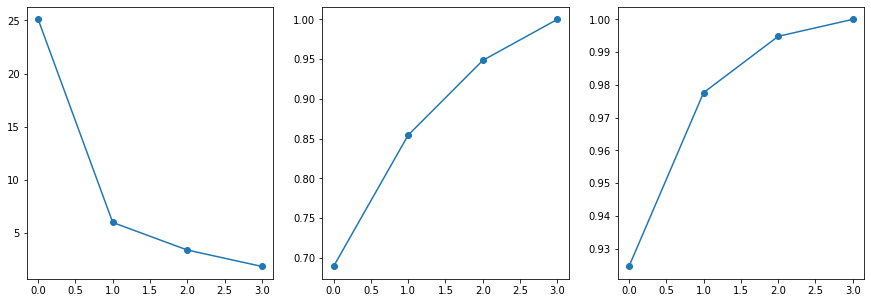

In [ ]:
fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(15,5))

#Singular values plot
axs[0].plot(s, "o-")

#Cumulative fraction plot
cum_variance = []
for i in range(len(s)):
  var = 0
  for j in range(i+1):
    var += s[j]
  cum_variance.append(var/np.sum(s))

axs[1].plot(cum_variance, "o-")

#Fraction of the "explained variance"
exp_variance = []
for i in range(len(s)):
  var = 0
  for j in range(i+1):
    var += s[j]**2
  exp_variance.append(var/np.sum(s**2))

axs[2].plot(exp_variance, "o-")

Principal Components

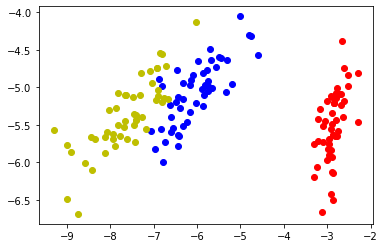

In [ ]:
PHI = U.T @ A

fig, ax = plt.subplots(nrows=1,ncols=1)
for i in range(PHI.shape[1]):
  if(labels[i] ==  "Iris-setosa"):
    ax.scatter(PHI[0, i], PHI[1, i], c="r")
  if(labels[i] == "Iris-versicolor"):
    ax.scatter(PHI[0, i], PHI[1, i], c="b")
  if(labels[i] == "Iris-virginica"):
    ax.scatter(PHI[0, i], PHI[1, i], c="y")